### CS649 Project - NYC Parking Tickets Analysis for Fiscal year 2021
#### By Parul Jain (825191465) and Aradhya Agrawal (827930190)

In [1]:
# required imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

<div class="alert alert-block alert-success">
    
### Dataset
    
#### File 1 - Parking Violation data
- The dataset is downloaded from open and public repository of https://opendata.cityofnewyork.us/
- It contains the information about the Parking Violations issued in the fiscal year 2021
- The original dataset can be found at https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2021/kvfd-bves

   
#### Taking a fraction of data for analysis
- The original dataset for the year 2021 contains approximately 14.9M rows.
- Due to the hardware limitations, only 30% of the dataset is used in this analysis.
- The selection of the data is such that the monthly distribution of tickets is similar to that of orginal data. 

#### Reason for taking 30 percent of each month
- The data selection is done for each month and not on the whole data. This is due to the fact that the number of tickets vary in each month which might lead to data imbalance while making selection.

#### File 2 - Violation Codes data
- This file contains the Description and Fine information for all the violation codes in File 1. 
    
### Goals of the Analysis
The NYC Parking Violation data consists of numerous columns that can be interpreted in many ways to analyze the information. With this analysis we are trying to answer the below question.
- What time of the day are the most are the most violations happening?
- What are violations patterns on all week days? Does the day of the week and time of the day reveal important information?
- The fined vehicles belongs to which state? (Based on registration plates)
- Monthly violations pattern for New York registered Vehicles V/s other states registered vehicles.
- Which agency issues the most tickets V/s which agency collects the maximum fine?
- What type of violation is frequent and how much total fine is collected from different violations in year 2021?
- Which county/borough is having the maximum parking violation?
- What type of violations happen in different counties?
- What time of the day has maximum tickets in different counties 
- What plate types violates the parking laws?
    
### Data Preparation and Cleaning
- Shape of original dataset - (14955523, 43)
- 9 columns with more than 50% missing values are dropped.
- A new column 'month' is created from existing 'Issue Date' column.
- For every month, 30% of data is collected, put into a dataframe and saved as 'Each_month30.csv' which is then read in this python file for analysis.
    
    </div>

<div class="alert alert-block alert-warning">
    
#### Download the data used in this notebook from below link :
   - https://drive.google.com/file/d/1Jbr_Qin30-Huvd5QhGQR8ebmxwIumA5U/view?usp=sharing
    
- Update the 'path' variable below with the path and name of the csv file.
        
#### Download the violation code file from the below link :
   - https://docs.google.com/spreadsheets/d/1Q6uEBprqJTqX7OBWSr4fhW1mQ1zbyiXB/edit?usp=sharing&ouid=107259805235552733392&rtpof=true&sd=true <br>
    
   - Update the 'fine_path' variable below with the path and name of the xlsx file.
    
</div>

In [59]:
# Reading violations data
path = 'Each_month30.csv'
fine_path = 'ParkingViolationCodes_Fine.xlsx'
data = pd.read_csv(path ,dtype='unicode', 
                   parse_dates=['Issue Date'])
data.head()

,Unnamed: 0,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,...,Date First Observed,Law Section,Sub Division,Days Parking In Effect,Vehicle Color,Vehicle Year,Feet From Curb,Violation Post Code,Violation Description,month
0,1240191,8769749279,JJK4026,NY,PAS,2020-07-31,38,SUBN,HONDA,T,...,0,408,D,YYYYYY,BK,2019,0,27-A,NaN,7
1,1170674,5600349403,HUW3980,NY,PAS,2020-07-15,12,4DSD,HONDA,V,...,0,1111,C,NaN,GY,2014,0,NaN,MOBILE BUS LANE VIOLATION,7
2,686770,8516935206,X99LCT,NJ,PAS,2020-07-25,38,SUBN,DODGE,T,...,0,408,I4,YYYYYY,BLUE,0,0,21,NaN,7
3,715309,8621515465,AV90231,CT,PAS,2020-07-07,38,SUBN,SUBAR,T,...,0,408,J2,YYYYYY,GREY,0,0,08,NaN,7
4,337479,8814418858,L12MEZ,NJ,PAS,2020-07-23,31,2DSD,INFIN,T,...,0,408,I3,YYYYY,BLACK,0,0,07,NaN,7


In [3]:
# 4486657 rows across 35 features
data.shape

(4486657, 35)

In [60]:
# Reading violation codes data 

violation_code = pd.read_excel(fine_path)
violation_code.rename(columns={"VIOLATION CODE":"Violation Code",
                               'VIOLATION DESCRIPTION':'Violation Description' }, inplace=True)
violation_code.shape

(98, 4)

#### Coverting the data type of Violation Code and Month to int. 



In [5]:
# changing the datatype of columns
data[["Violation Code",'month']] = data[['Violation Code','month']].astype(int)

#### Checking the hour by taking first 2 characters and last character for differentiating between AM and PM 

In [6]:
# Extracting the hour and time of the day from 'Violation Time' column
data['Violation_hour'] = data['Violation Time'].str[:2]
data['AM/PM'] = data['Violation Time'].str[-1]

#### Taking a look over the percentage of null Values, because we need to drop the columns having high number of null values

In [7]:
round((data.isnull().sum()*100)/len(data),2)

Unnamed: 0                            0.00
Summons Number                        0.00
Plate ID                              0.00
Registration State                    0.00
Plate Type                            0.00
Issue Date                            0.00
Violation Code                        0.00
Vehicle Body Type                     0.28
Vehicle Make                          0.23
Issuing Agency                        0.00
Street Code1                          0.00
Street Code2                          0.00
Street Code3                          0.00
Vehicle Expiration Date               0.00
Violation Location                   34.13
Violation Precinct                    0.00
Issuer Precinct                       0.00
Issuer Code                           0.00
Issuer Command                       34.06
Issuer Squad                         34.61
Violation Time                        0.00
Violation County                      0.22
Violation In Front Of Or Opposite    34.46
House Numbe

#### In the next cell we create a list drop columns to remove unwanted columns. In the cell next to this we use drop() to remove all the unwanted columns. Basically these columns cannot be used to solve the questions we trying to solve.

In [8]:
# dropping extra columns that are not used in this analysis
drop_columns = ['Unnamed: 0','Issuer Code', 'Issuer Command','Violation Description','Street Code1','Street Code2','Street Code3','Issuer Squad','Violation In Front Of Or Opposite','House Number','Law Section','Sub Division','Vehicle Color','Vehicle Year','Violation Post Code','Violation Location','Days Parking In Effect']

In [9]:
# saving the filtered data in new dataframe
df = data.drop(drop_columns,axis=1)
df.shape

(4486657, 20)

#### The next cell basically joining both the tables because further we will be calculating and analysing various factors related to fine.

In [10]:
# merging violation information with filtered data from above
df = df.merge(violation_code, on ='Violation Code',how='left')

Dropping column 'Manhattan  96th St. & below\n(Fine Amount $)' because both columns have same values

In [11]:
# dropping more columns
df = df.drop('Manhattan  96th St. & below\n(Fine Amount $)',axis=1)

#### Converting null values in PlateID to 'Missing' values

In [12]:
# changing the missing plate ID to 'missing' 
df.loc[df['Plate ID'].isnull(),'Plate ID'] = 'Missing'

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4486657 entries, 0 to 4486656
Data columns (total 22 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   Summons Number                   object        
 1   Plate ID                         object        
 2   Registration State               object        
 3   Plate Type                       object        
 4   Issue Date                       datetime64[ns]
 5   Violation Code                   int32         
 6   Vehicle Body Type                object        
 7   Vehicle Make                     object        
 8   Issuing Agency                   object        
 9   Vehicle Expiration Date          object        
 10  Violation Precinct               object        
 11  Issuer Precinct                  object        
 12  Violation Time                   object        
 13  Violation County                 object        
 14  Street Name                      o

#### Converting data type of violation code to "str" 

In [14]:
# changing type of violation code to string
df["Violation Code"] = df['Violation Code'].astype(str)

In [15]:
# Renaming column to more readable name
df.rename(columns={"All Other Areas\n(Fine Amount $)":"Fine"}, inplace=True)

In [16]:
# Checking the 'Violation code' for which description is not present
df[df['Violation Description'].isnull()]['Violation Code'].unique()

array(['0', '95'], dtype=object)

#### This article states that violation codes 95 and 0 does not exist. Hence, dropping the rows with these codes.
https://www1.nyc.gov/site/finance/vehicles/services-violation-codes.page

In [17]:
# dropping rows with violation codes 95 and 0
df = df.loc[~df['Violation Code'].isin([95,0]),:]

# dropping rows with vehicles having '99' as registration state  
df = df.loc[~df['Registration State'].isin(['99']),:]

In [18]:
# Confirming that AM/PM have right data
df['AM/PM'].unique()

array(['A', 'P', nan, '4', '8', '5', '9', '3', '1', '7', '0'],
      dtype=object)

In [19]:
# dropping the rows with integer values in AM/PM Column
df.drop(df[~df['AM/PM'].isin(["A", "P"])].index, inplace = True)

In [20]:
# Confirming that Violation_hour have right data
df['Violation_hour'].unique()

array(['11', '05', '03', '02', '01', '12', '04', '09', '06', '08', '07',
       '10', '00', '43', '22', '55', '48', '85', '78', '58', '56', '0 ',
       '17', '38', '13', '87'], dtype=object)

#### Here we have to convert the violation hour to integer because there are again some ambiguous values like 78, 87 which not correct. We are dropping all the values greater than 13 because the count of those values is less and dropping will not affect our data

In [21]:
# Converting violation hour to from string to integer. 
df["Violation_hour"] = df['Violation_hour'].astype(str).astype(int)

df.drop(df[df['Violation_hour']>=13].index, inplace = True)
df['Violation_hour'].unique()

array([11,  5,  3,  2,  1, 12,  4,  9,  6,  8,  7, 10,  0])

#### In the next few cells we have bucketed the times into separate time of the day which helps us to check at what  time of the day is the highest number of parking tickets are given

In [22]:
# bucketing times into separate bins for different times of day
time_division = [
            (df["AM/PM"] == "A") & ((df["Violation_hour"]==12) | (df["Violation_hour"]>=0) & (df["Violation_hour"]<3)),
            (df["AM/PM"] == "A") & (df["Violation_hour"]>=3) & (df["Violation_hour"]<6),
            (df["AM/PM"] == "A") & (df["Violation_hour"]>=6) & (df["Violation_hour"]<9),
            (df["AM/PM"] == "A") & (df["Violation_hour"]>=9) & (df["Violation_hour"]<12),
            (df["AM/PM"] == "P") & ((df["Violation_hour"]==12) | (df["Violation_hour"]>=1)& (df["Violation_hour"]<3)),
            (df["AM/PM"] == "P") & (df["Violation_hour"]>=3) & (df["Violation_hour"]<6),
            (df["AM/PM"] == "P") & (df["Violation_hour"]>=6) & (df["Violation_hour"]<9),
            (df["AM/PM"] == "P") & (df["Violation_hour"]>=9) & (df["Violation_hour"]<12),
                ]

In [23]:
# giving labels to different times of the day
time_vals = ['midnight', 'early_morning', 'morning', 'late_morning', 'afternoon', 'evening', 'late_evening', 'night']

In [24]:
# adding the new column for the time of the day
df['day_duration'] = np.select(time_division, time_vals)

In [25]:
# Adding week day name based on'Issue Date'
df['Day'] = df['Issue Date'].dt.day_name()

In [26]:
# Checking the violation county column
df['Violation County'].unique()

array(['Q', 'MN', 'NY', 'BX', 'K', 'BK', 'QN', 'R', 'ST', nan, 'Bronx',
       'Kings', 'Qns', 'Rich', 'KINGS', 'RICH'], dtype=object)

- OOPS!! The data shows that for some counties the label is different for same county.
- Example, Kings is entered in 3 different ways- Kings, K and KINGS.

#### For easy analysis we are keeping Boroughs and Counties separate.

In [27]:
# renaming the same counties with different names
df.loc[df['Violation County'].isin(['K','KINGS','Kings']),'Violation County'] = 'Kings'
df.loc[df['Violation County'].isin(['R','RICH','Rich']),'Violation County'] = 'Richmond'
df.loc[df['Violation County'].isin(['BX','Bronx']),'Violation County'] = 'Bronx'
df.loc[df['Violation County'].isin(['Q','QN','Qns']),'Violation County'] = 'Queens'
df.loc[df['Violation County'].isin(['BK']),'Violation County'] = 'Brooklyn(Borough)'
df.loc[df['Violation County'].isin(['MN']),'Violation County'] = 'Manhattan(Borough)'
df.loc[df['Violation County'].isin(['NY']),'Violation County'] = 'New York'
df.loc[df['Violation County'].isin(['ST']),'Violation County'] = 'Staten Island(Borough)'

## Visualization

In [28]:
# Checking the violation distribution at different times of the day.
dd_vs_c = df[df['day_duration']!='0'].groupby(['day_duration'])['Summons Number'].count().reset_index().rename(columns={"Summons Number":"Count"})

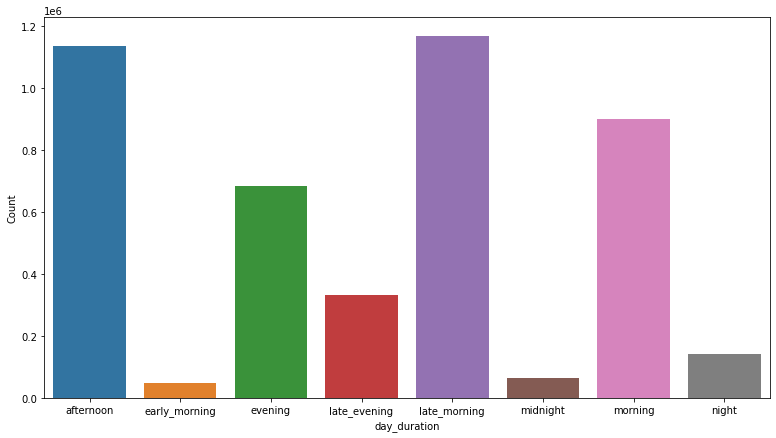

In [29]:
plt.figure(figsize=(13,7))
p = sns.barplot(x='day_duration', y = 'Count', data = dd_vs_c)

| Time of the day | From | To |
| --- | --- | --- |
| Midnight | 12 am  | 3 am |
| Early morning | 3 am | 6 am |
| Morning | 6 am | 9 am |
| Late morning | 9 am | 12 pm |
| Afternoon | 12 pm | 3 pm |
| Evening | 3 pm | 6 pm |
| Late Evening | 6 pm | 9 pm |
| Night | 9 pm | 12 am  |

#### Observation
- Maximum violations happen between 9 am and 3 pm. 
- Let see if this is same for different days in week.

#### In the next graph we check that what are the time  on different days of the week for the highest number of tickets to be issued.

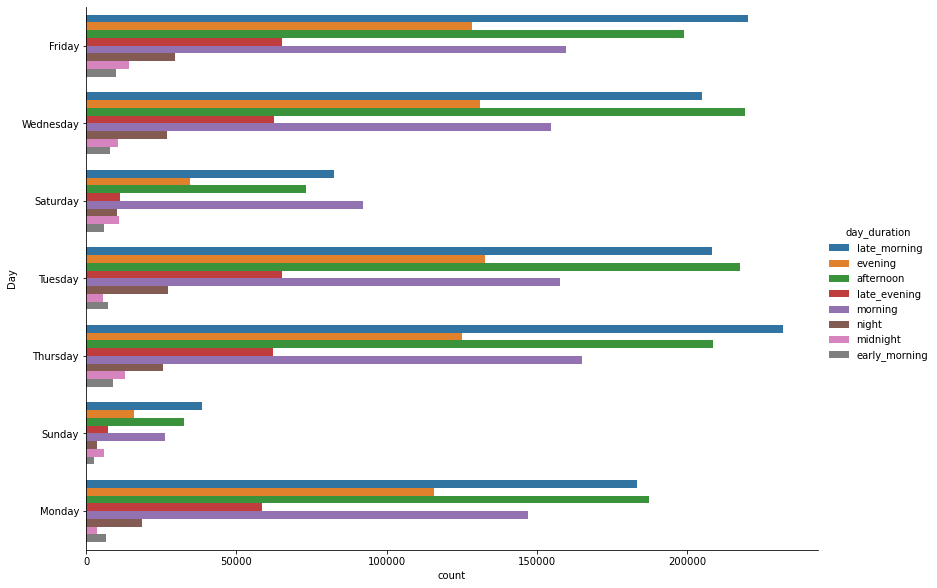

In [30]:
sns.catplot(y='Day', data=df[df['day_duration']!='0'], hue='day_duration', kind="count",height=8.27, aspect=11.7/8.27)

#### Observations:

1) The most common timing for tickets on all days except saturday are late morning(9:00 AM to 12:00 PM) and afternoon(12PM to 3PM). <br>
2) On Sundays and Saturdays that is weekends the lowest number tickets are issued. <br>
3) On Saturday the tickets are highest for morning 6AM to 9AM. <br>
4) The lowest tickets are in early morning.

Text(0.5, 1.0, 'Top 10 Violations count based on Registration Plate')

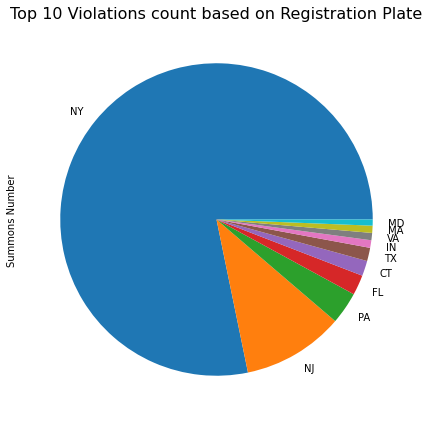

In [31]:
# counting the number of tickets per Registration plate State 
state_ticket =df.groupby(by='Registration State')['Summons Number'].count().sort_values(ascending=False).head(10)
state_ticket.plot.pie(figsize=(7, 10))
plt.title("Top 10 Violations count based on Registration Plate", fontsize=16)

### Clearly, maximum cars fined are registered with New York and New Jersey 

#### Now we compare the registration plates of New York and all other states. 

In [32]:
# Monthly distribution of parking tickets for NY and other counties
month_state = df[['Registration State','month']]
month_state.loc[month_state['Registration State']!='NY','Registration State'] = 'Other'

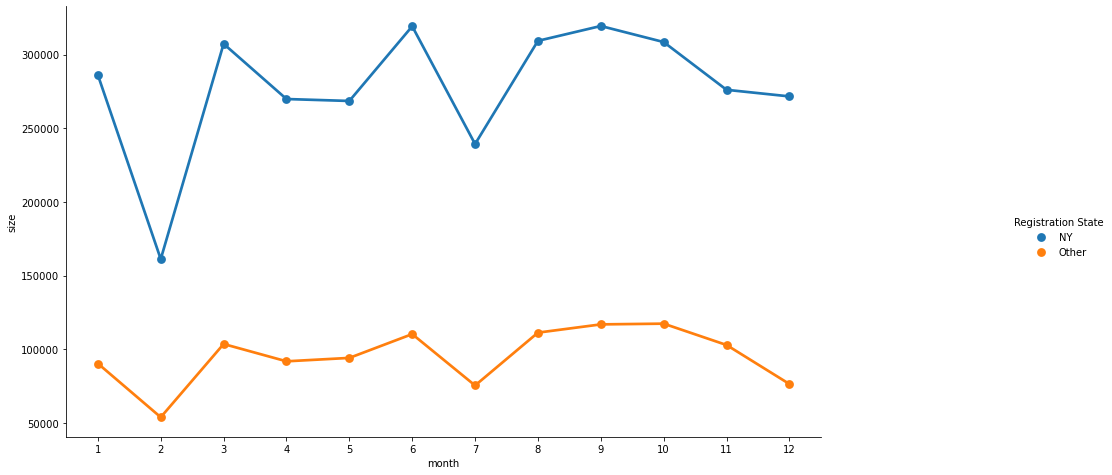

In [33]:
month_state1 = month_state.groupby(['month','Registration State'],as_index=False).size()
p= sns.factorplot(x='month', y='size', hue='Registration State', data=month_state1)
p.fig.set_figwidth(18)
p.fig.set_figheight(7)

#### Observations: 

1) Even sum of all the other states is lower than that of Total New York's. <br>
2) The pattern for each month is similar for the both types of registration plates.

In [34]:
# Top 10 tickets issuing agencies
ia_plot = df.groupby(['Issuing Agency'])['Summons Number'].count().sort_values(ascending=False).reset_index().head(10)
# Top 10 tickets issuing agencies that collected maximum fine
ia_fine = df.groupby(['Issuing Agency'])['Fine'].sum().sort_values(ascending=False).reset_index().head(10)
ia_plot = ia_plot.merge(ia_fine, on ='Issuing Agency',how='inner').rename(columns={'Summons Number':'Count'})

#### Next we plot a bar plot (Total number of tickets and Issuing agency) and line chart (Total fine of tickets and Issuing agency) 

Text(0.5, 0, 'Issuing Agency')

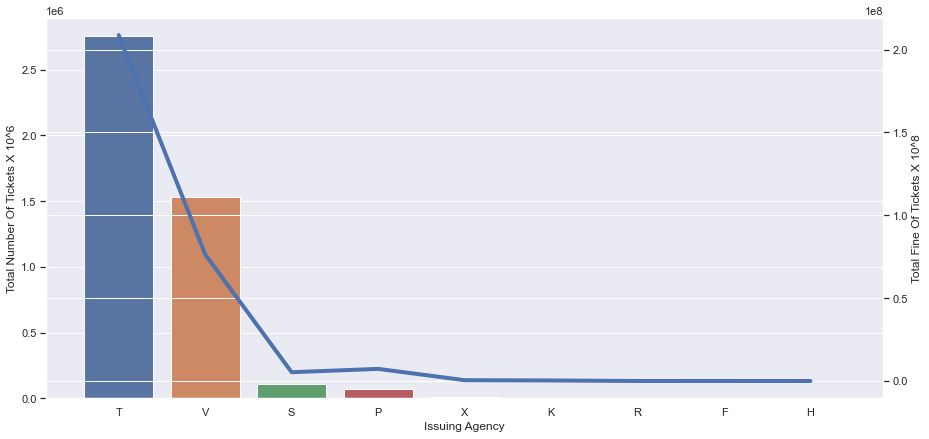

In [35]:
sns.set(rc={'figure.figsize':(15,7)})

p1 = sns.barplot(x = 'Issuing Agency', y = 'Count',data = ia_plot)
p1.set_ylabel("Total Number Of Tickets X 10^6")
ax2 = plt.twinx()
p = sns.lineplot(data=ia_plot['Fine'], lw = 4,ax = ax2)
p.set_ylabel("Total Fine Of Tickets X 10^8")
p.set_xlabel("Issuing Agency")

#### Observations:
1) Issuing agency P has lower number of tickets but the fine collection of P is higher than that of S.

#### Now looking at different Violation Codes, their counts and fines collected from them. 

In [36]:
# most frequent type of violation
violation_Code = df.groupby('Violation Code',as_index = False)["Summons Number"].count().sort_values(by = "Summons Number", ascending=False).rename(columns={'Summons Number':'Count'}).head(20)
Violation_fine = df.groupby('Violation Code', as_index = False)['Fine'].sum().sort_values(by = "Fine", ascending=False).head(10)
violation_Code = violation_Code.merge(Violation_fine, on ='Violation Code',how='inner').rename(columns={'Summons Number':'Count'})

In [37]:
violation_Code

,Violation Code,Count,Fine
0,36,1245574,62278700.0
1,21,525811,23661495.0
2,38,340618,11921630.0
3,14,298747,34355905.0
4,20,259227,15553620.0
5,40,254318,29246570.0
6,71,152227,9894755.0
7,46,139649,16059635.0
8,19,93414,10742610.0
9,31,90834,10445910.0


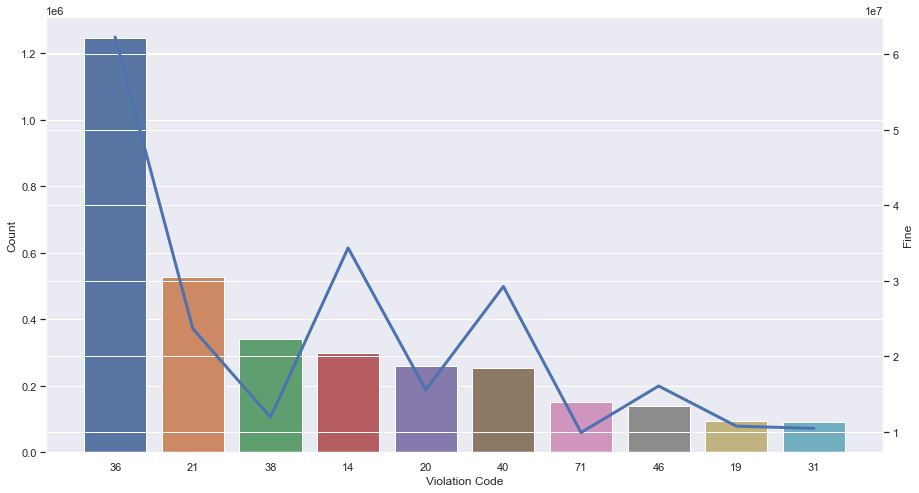

In [38]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Violation Code', y ='Count' , data = violation_Code[['Violation Code', 'Count']])
ax2 = plt.twinx()
sns.lineplot(x = "Violation Code", y = "Fine", lw = 3,data = violation_Code[['Violation Code', 'Fine']],ax = ax2)
plt.show()

In [39]:
df[df['Violation Code'].isin(violation_Code['Violation Code'])][['Violation Code', 'Violation Description']].drop_duplicates()

,Violation Code,Violation Description
0,38,FAIL TO DSPLY MUNI METER RECPT
4,31,NO STANDING-COMM METER ZONE
7,46,DOUBLE PARKING
9,36,PHTO SCHOOL ZN SPEED VIOLATION
12,19,NO STANDING-BUS STOP
20,20,NO PARKING-DAY/TIME LIMITS
21,14,NO STANDING-DAY/TIME LIMITS
24,21,NO PARKING-STREET CLEANING
38,40,FIRE HYDRANT
40,71,INSP. STICKER-EXPIRED/MISSING


#### Observations:
1. For most of the cases the total fine is in proportion with the number of tickets but incase of violation codes 14, 40 and 46, the fine collected is higher than the number of tickets.<br>
2. 'NO STANDING-DAY/TIME LIMITS' and 'FIRE HYDRANT' are more expensive offences to make than 'NO PARKING-STREET CLEANING' OR 'FAIL TO DSPLY MUNI METER RECPT'


#### Counties and Borough Comparisons 

In [40]:
# violations count per county/borough
number_of_tickets_violation_county = df.groupby('Violation County',as_index = False)['Summons Number'].count().rename(columns={'Summons Number':'Count'})

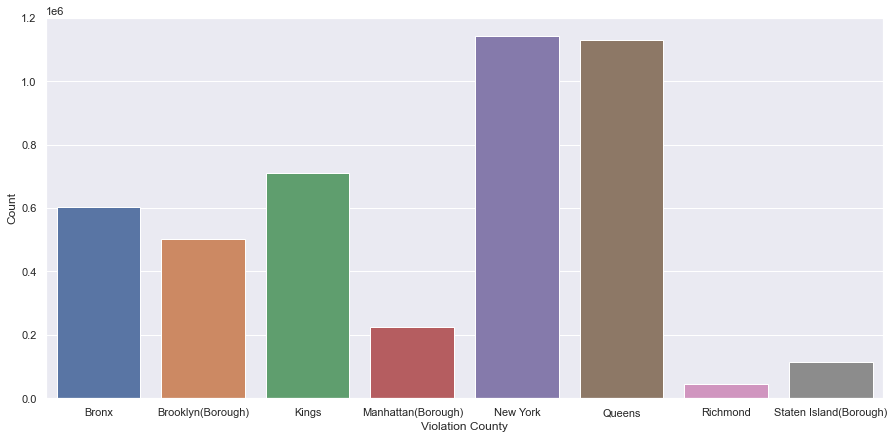

In [41]:
sns.set(rc={'figure.figsize':(15,7)})
p1 = sns.barplot('Violation County', 'Count',data = number_of_tickets_violation_county)

#### Observations:
1) New York and Queens have highest number of tickets. <br>
2) Richmond and Staten Island have minimum number of tickets.

This is not sufficient so further we look at the most common tickets in different counties.

In [42]:
# Violation in different counties
Violation_codes_per_county = df.groupby(['Violation County', 'Violation Code'],as_index = False)['Summons Number'].count().sort_values(by = "Summons Number", ascending = False)
Violation_codes_per_county = Violation_codes_per_county[Violation_codes_per_county['Summons Number'] > 5000]

<Figure size 2880x23040 with 0 Axes>

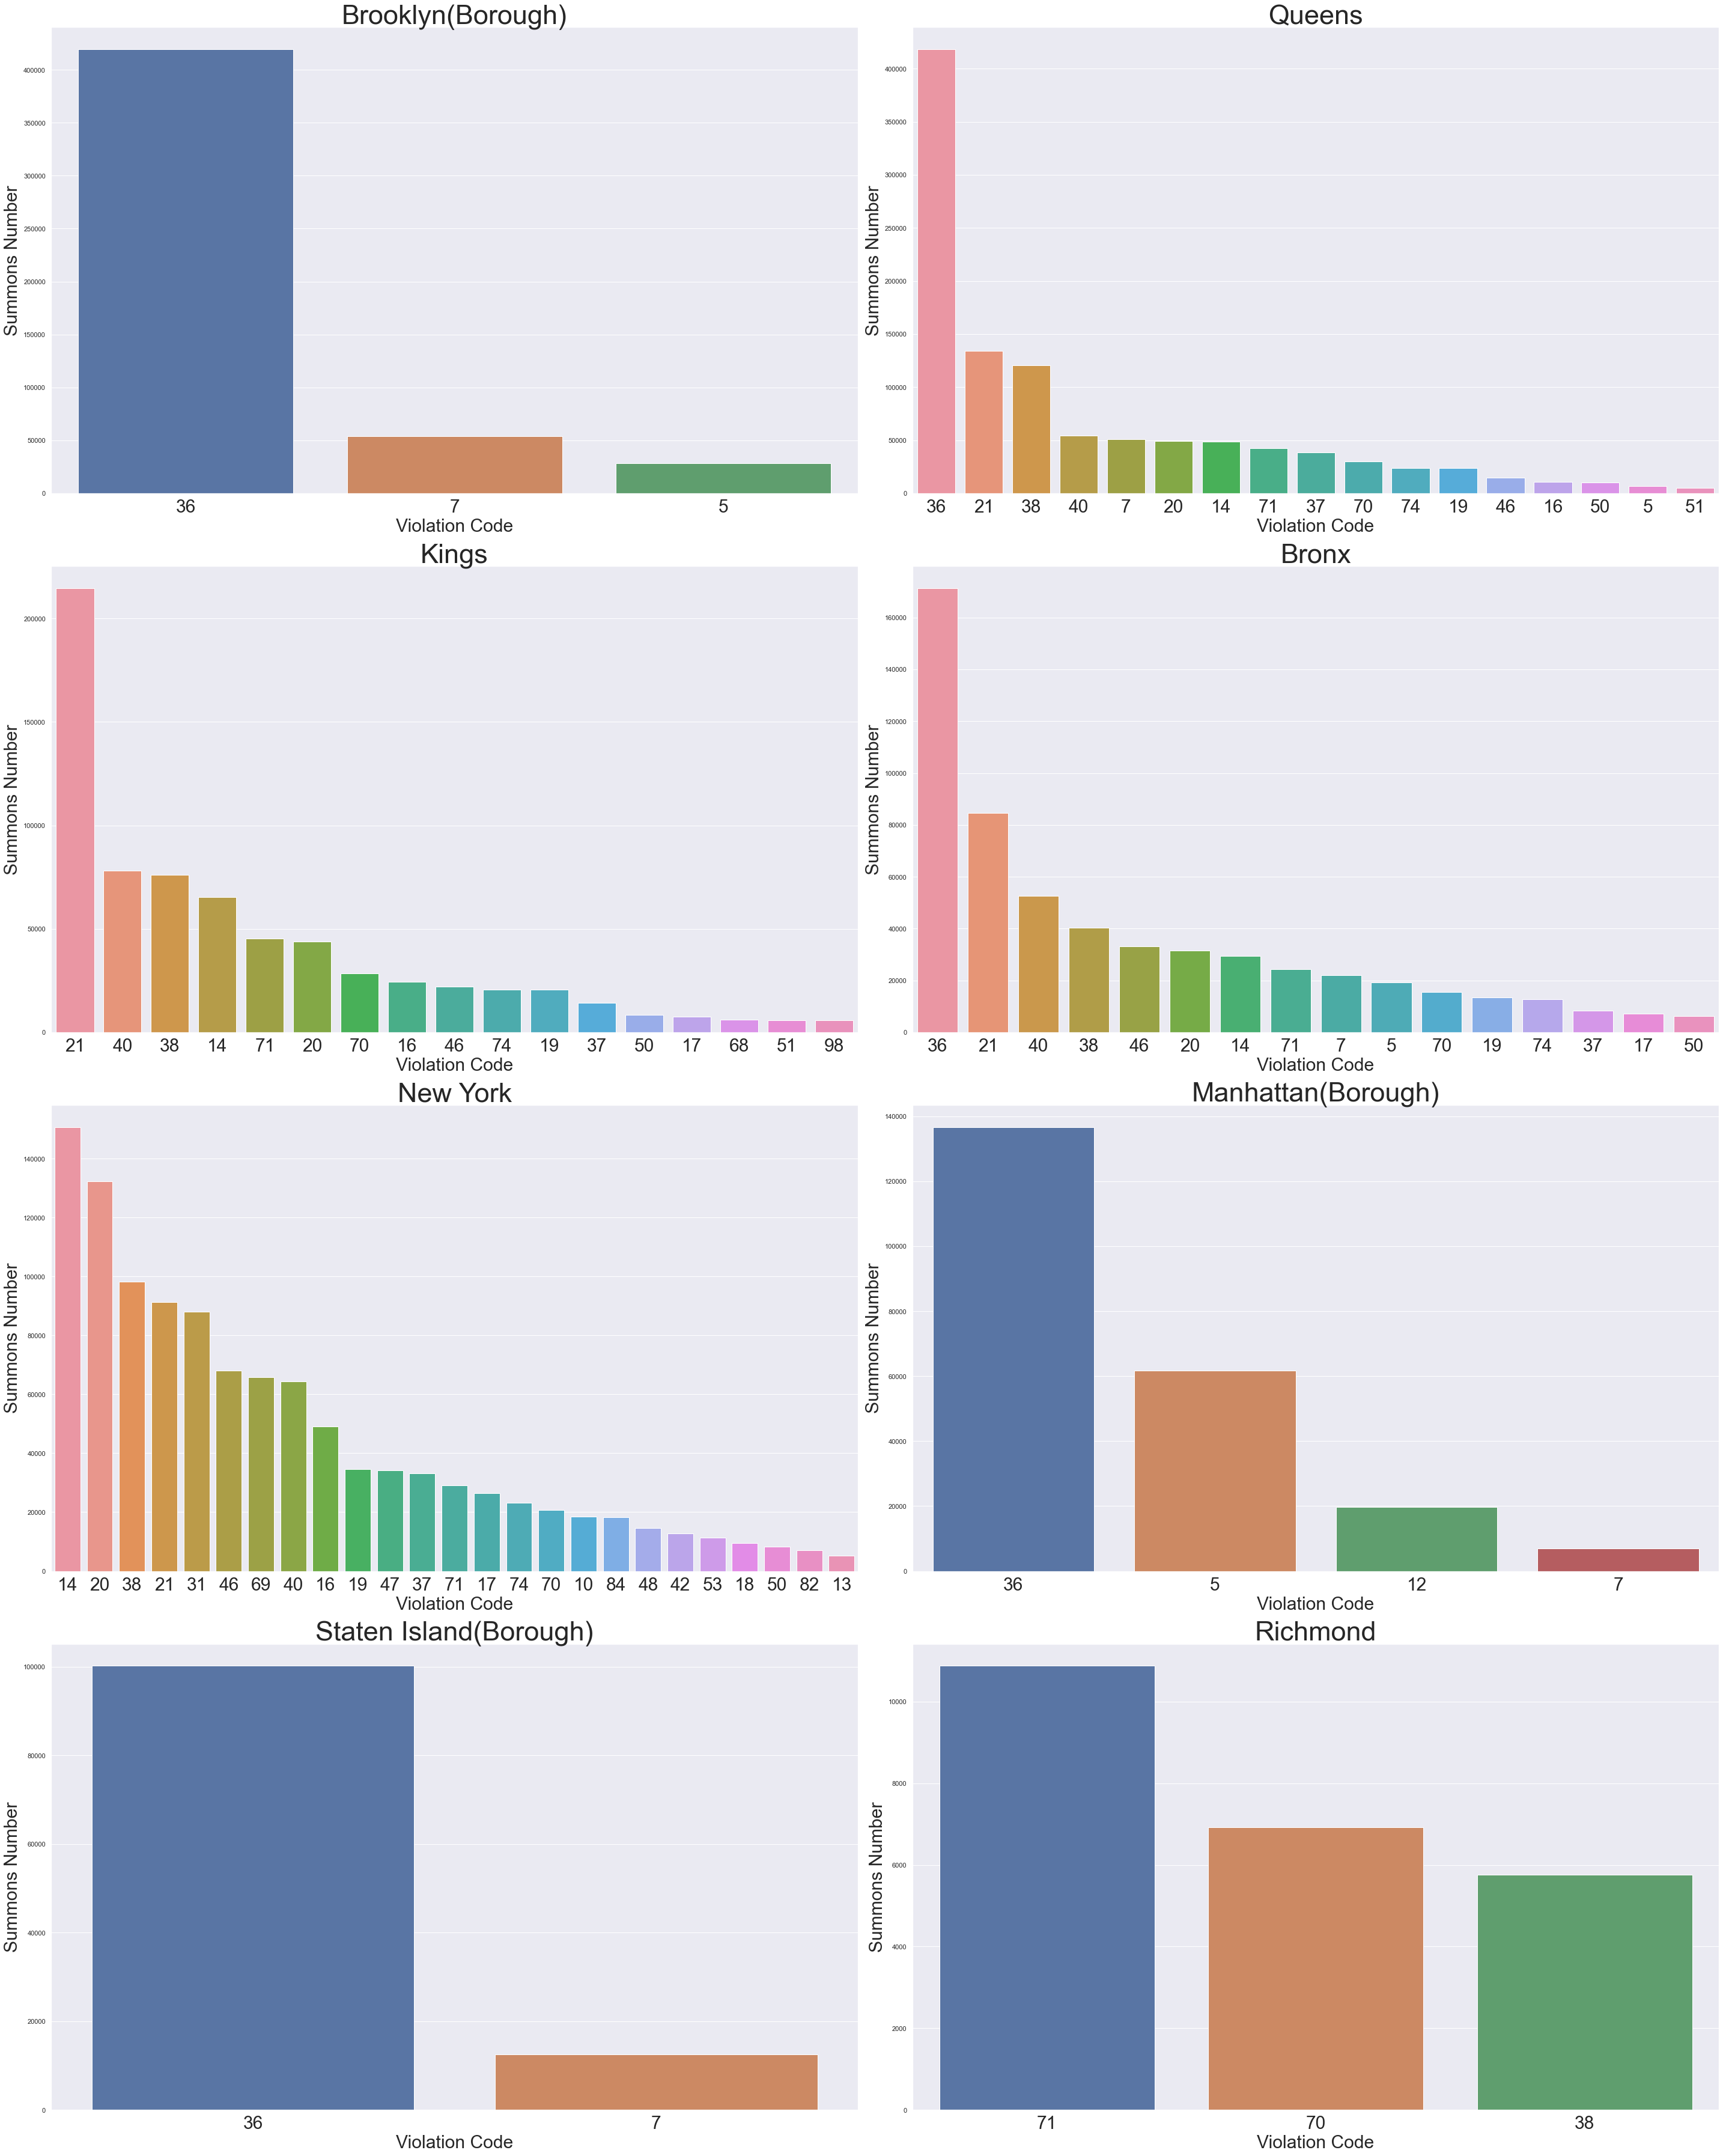

In [43]:
nr_rows = 4
nr_cols = 2

r=c=0
flag = 0
iter_ = 0

plt.figure(figsize = (40, 320))
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(40,50))

for county in Violation_codes_per_county['Violation County'].unique():
    df1 = Violation_codes_per_county[Violation_codes_per_county['Violation County']==county]
    x= df1['Violation Code']
    y= df1['Summons Number']
    axs[r][c].set_ylabel('Number of Tickets', fontsize = 30)
    axs[r][c].set_xlabel('Violation Code', fontsize = 30)
    axs[r][c].set_title(county,size=45)
    axs[r][c].set_xticklabels(x,fontsize=30)
    sns.barplot(x, y, ax = axs[r][c])
    

    if(iter_%2==0):
        c = 1
    elif(iter_%2==1):
        r = r+1
        c = 0
        
    iter_ = iter_ + 1   
plt.tight_layout()    
plt.show()

#### Observations:
1) The most common type of violation in most of the counties is 36 however New York, Kings and Richmond make an exception to this case. Both of the counties have other type of violations that are more common than school zone violations.  <br>
2) There are various kinds of violations happening in New York, Queens, Kings and Bronx whereas Staten Island, Richmond, Manhattan and Brooklyn shows less variation in types of violations. 


Further we check the Violation in counties on different day duration

### Day_Time for tickets in different counties

In [44]:
# What time of the day has maximum tickets in different counties 
day_duration_per_county = df.groupby(['Violation County', 'day_duration'],as_index = False)['Summons Number'].count()
day_duration_per_county = day_duration_per_county[day_duration_per_county['day_duration']!='0']

<Figure size 2880x23040 with 0 Axes>

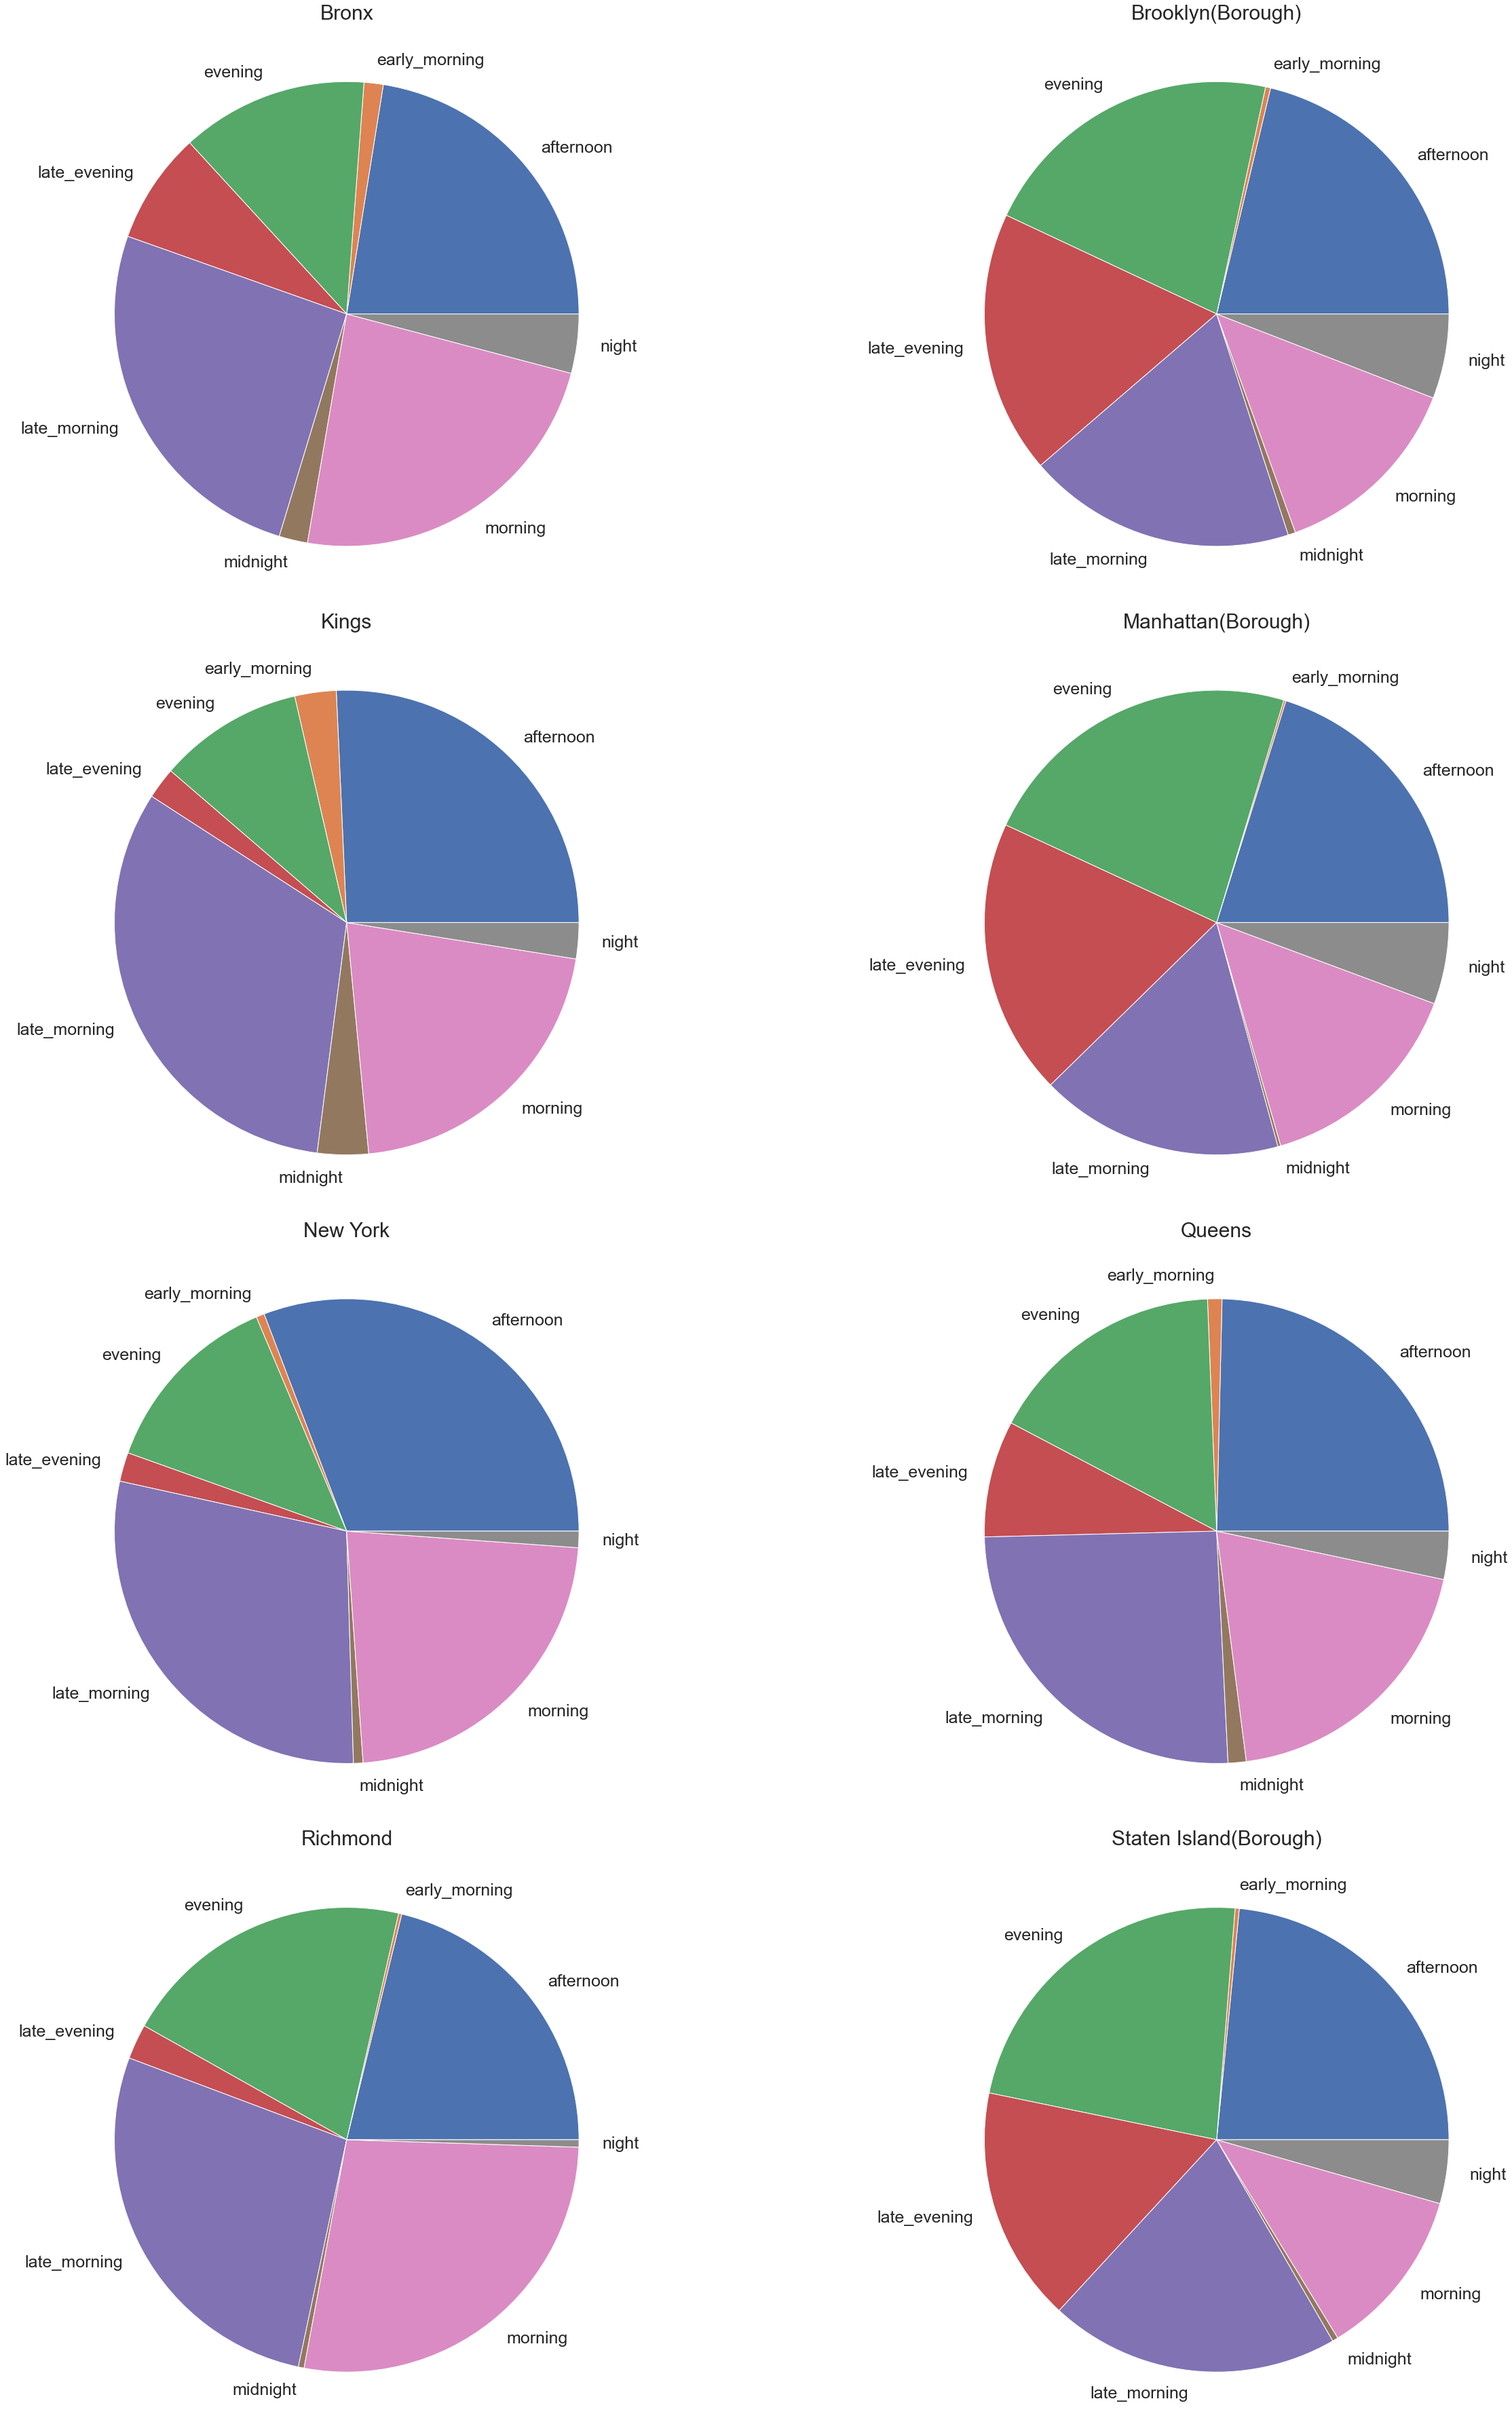

In [45]:
nr_rows = 4
nr_cols = 2

r=c=0
flag = 0
iter_ = 0
textprops = {"fontsize":25}

plt.figure(figsize = (40, 320))
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(40,50), squeeze=False)

for county in day_duration_per_county['Violation County'].unique():
    ax1 = plt.subplot2grid((4,2),(r,c))
    df1 = day_duration_per_county[day_duration_per_county['Violation County']==county]
    x= df1['day_duration']
    y= df1['Summons Number']
    plt.pie(y, labels = x, textprops =textprops)
    plt.title(county, fontsize=30)
    
    if(iter_%2==0):
        c = 1
    elif(iter_%2==1):
        r = r+1
        c = 0
        
    iter_ = iter_ + 1

plt.tight_layout()    
plt.show()

#### Observations
1. Manhattan, Brooklyn(Borough) and Staten Island have uniform distribution whole day round.
2. Whereas, if we look at New York, Kings, Richmond, Bronx and Queens have certain timings when the tickets are issued. 

In [46]:
# Total fine collected by each county v/s to total violations
Total_fine_each_county = df.groupby(['Violation County'],as_index = False)['Fine'].sum()

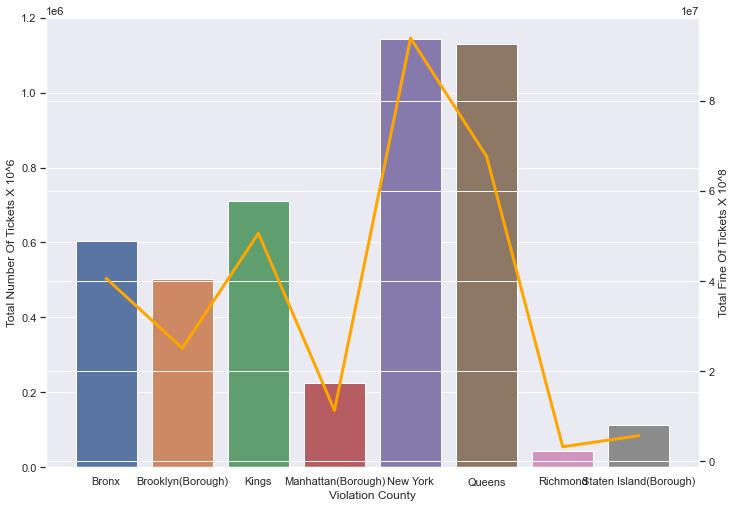

In [47]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

p1 = sns.barplot(x = 'Violation County', y = 'Count',data = number_of_tickets_violation_county)
p1.set_ylabel("Total Number Of Tickets X 10^6")
ax2 = plt.twinx()
p = sns.lineplot(x = 'Violation County', y = "Fine", data = Total_fine_each_county, lw = 3,ax = ax2, color='orange')
p.set_ylabel("Total Fine Of Tickets X 10^8")
p.set_xlabel("Violation County")
plt.show()

In [48]:
violation_try = number_of_tickets_violation_county.merge(Total_fine_each_county, on ='Violation County',how='inner')
violation_try["Ratio"] = violation_try['Fine']/violation_try['Count']
violation_try

,Violation County,Count,Fine,Ratio
0,Bronx,604330,40594165.0,67.172182
1,Brooklyn(Borough),501454,25072700.0,50.000000
2,Kings,711005,50586965.0,71.148536
3,Manhattan(Borough),225015,11250750.0,50.000000
4,New York,1143048,93951115.0,82.193499
5,Queens,1129107,67651735.0,59.916142
6,Richmond,44031,3176575.0,72.144058
7,Staten Island(Borough),112933,5646650.0,50.000000


#### Observation:
1) The average fine per ticket in New York is highest. <br>
2) Queens have more tickets issued than Kings, but the average fine per ticket in Kings is more than that of Queens. <br>
3) The Boroughs have same average fine per ticket.

In [49]:
# monthly collection of Fine
fine_each_county_month = df.groupby(['Violation County','month'],as_index = False)['Fine'].sum()

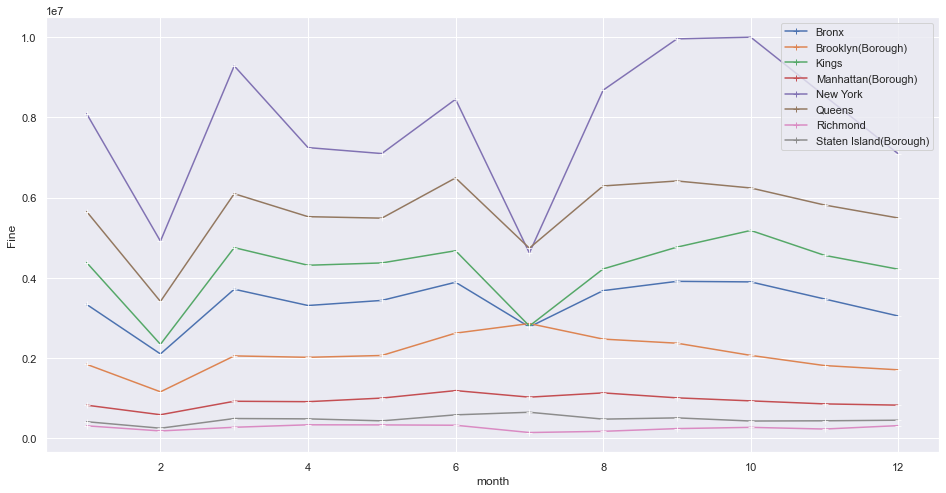

In [50]:
plt.figure(figsize = (16, 8))
ax = sns.lineplot(x="month", y="Fine", hue="Violation County", style = 'Violation County',
                  markers = ["+", "+","+", "+", "+", "+", "+", "+" ], dashes = False,
     data=fine_each_county_month)
ax.legend(loc='upper right')
plt.show()

#### Observation:

1) The fine collected in all counties shows a similar pattern across all the months. <br>
2) In the month of July the fine collection in Brooklyn increases but in all other counties the fine decreases.   

### Analysis based on plate types and plate ID

In [51]:
# top vehicle types that gets the tickets
plate_type = df.groupby('Plate Type', as_index=False)['Summons Number'].count().sort_values(by ='Summons Number',ascending=False).rename(columns={'Summons Number':'Count'}).head(10)

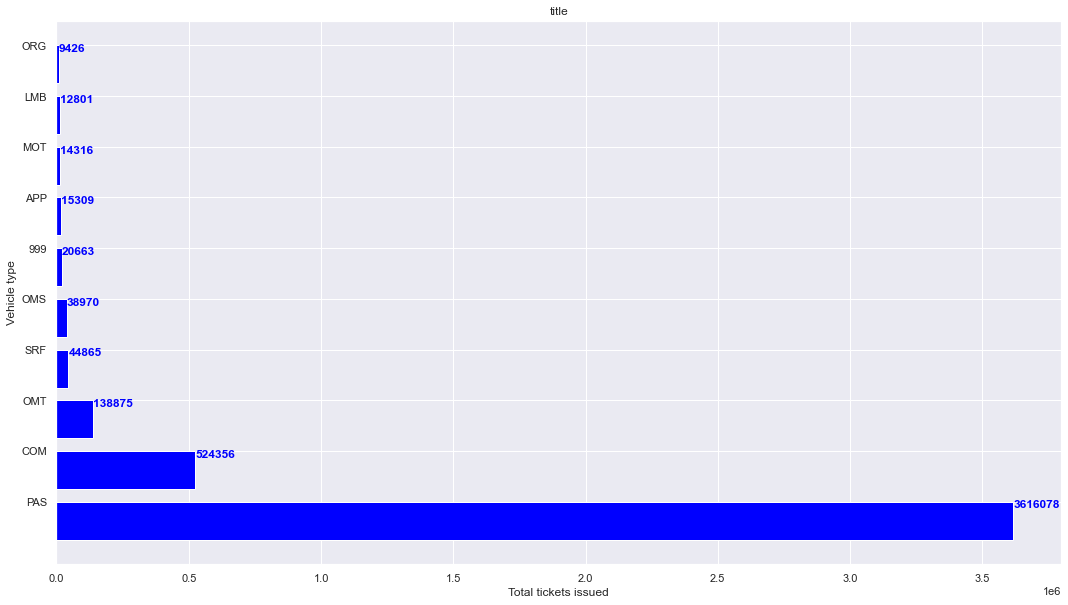

In [52]:
x = plate_type['Plate Type']
y = plate_type['Count']

fig, ax = plt.subplots(figsize=(18,10))    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('title')
plt.xlabel('Total tickets issued')
plt.ylabel('Vehicle type')    
for i, v in enumerate(plate_type['Count']):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
#plt.show()

In [53]:
plate_type_fine = df.groupby('Plate Type', as_index=False)['Fine'].sum().sort_values(by ='Fine',ascending=False).head(10)

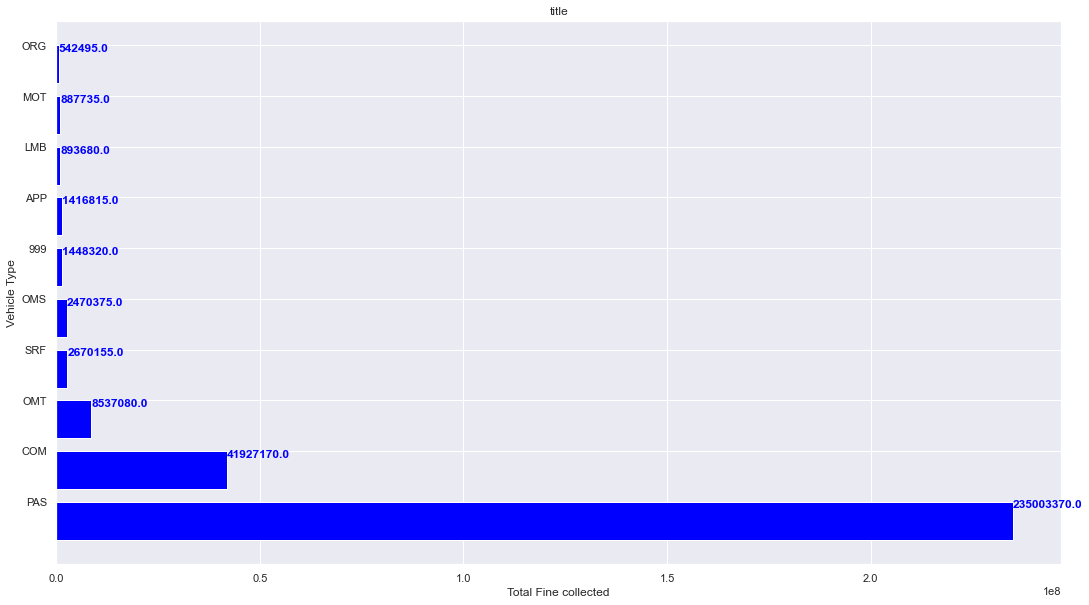

In [54]:
x = plate_type_fine['Plate Type']
y = plate_type_fine['Fine']

fig, ax = plt.subplots(figsize=(18,10))    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('title')
plt.xlabel('Total Fine collected')
plt.ylabel('Vehicle Type')    
for i, v in enumerate(plate_type_fine['Fine']):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
#plt.show()

In [55]:
violation_try = plate_type.merge(plate_type_fine, on ='Plate Type',how='inner')
violation_try["Ratio"] = violation_try['Fine']/violation_try['Count']
violation_try

,Plate Type,Count,Fine,Ratio
0,PAS,3616078,235003370.0,64.988468
1,COM,524356,41927170.0,79.959360
2,OMT,138875,8537080.0,61.473123
3,SRF,44865,2670155.0,59.515324
4,OMS,38970,2470375.0,63.391712
5,999,20663,1448320.0,70.092436
6,APP,15309,1416815.0,92.547848
7,MOT,14316,887735.0,62.009989
8,LMB,12801,893680.0,69.813296
9,ORG,9426,542495.0,57.553045


#### Observation:
The highest ratio of fine to count is for APP (Vehicles with international plates) and COM (Commercial Vehicles). That means the average fine paid by the COM and APP vehicles is more than that of any other kind of vehicle.

In [56]:
frequent_plate_tickets = df.groupby(['Plate ID','Plate Type'],as_index=False)['Summons Number'].count().sort_values(by ='Summons Number',ascending=False).head(10)
frequent_plate_tickets

,Plate ID,Plate Type,Summons Number
18580,12125MJ,COM,382
221668,86145MM,COM,273
174539,72479ML,COM,258
259414,96091MA,COM,255
20565,12821KA,COM,243
110592,47603MD,COM,242
1826416,PRZ9946,PAS,238
20665,12863KA,COM,237
246379,91665MC,COM,229
321324,AT461E,PAS,229


In [57]:
frequent_plate_fine = df.groupby(['Plate ID','Plate Type'],as_index=False)['Fine'].sum().sort_values(by ='Fine',ascending=False).head(10)
frequent_plate_fine

,Plate ID,Plate Type,Fine
18580,12125MJ,COM,42170.0
221668,86145MM,COM,29985.0
174539,72479ML,COM,28345.0
110592,47603MD,COM,25910.0
20665,12863KA,COM,25250.0
20565,12821KA,COM,25160.0
213462,83460MH,COM,24990.0
25406,14828MJ,COM,24730.0
76624,31377MG,COM,24455.0
215005,83997MN,COM,23795.0


In [58]:
frequent_plate_violation = df.groupby(['Plate ID','Violation Code','Violation Description'],as_index=False)['Summons Number'].count().sort_values(by ='Summons Number',ascending=False).head(10)
frequent_plate_violation

,Plate ID,Violation Code,Violation Description,Summons Number
27742,12125MJ,14,NO STANDING-DAY/TIME LIMITS,242
3191872,XX165A,20,NO PARKING-DAY/TIME LIMITS,176
138643,31404MG,20,NO PARKING-DAY/TIME LIMITS,166
41778,14828MJ,46,DOUBLE PARKING,165
227804,53195ML,46,DOUBLE PARKING,162
138688,31410MG,20,NO PARKING-DAY/TIME LIMITS,161
115195,28509MH,20,NO PARKING-DAY/TIME LIMITS,157
398678,83523MH,20,NO PARKING-DAY/TIME LIMITS,155
118553,29082ML,14,NO STANDING-DAY/TIME LIMITS,148
484770,96594MJ,47,DOUBLE PARKING-MIDTOWN COMML,144


#### The Funny Observation: 
1) Owner of Plate ID 12125MJ is paying $42170/year in tickets, which could be more than his vehicle total cost. The repeated violations done by this vehicle is "NO STANDING-DAY/TIME LIMITS". <br>
2) This type of mistakes is made by other commercial vehicles also. Being considerate of parking rules can save huge amount of money to the owners of these vehicles.  


### Results and Conclusion:

1. The maximum violations occur in New York County by the New York registered plates.
2. The time of day when most tickets are issued changes for each county. For instance, in Manhattan, the number tickets issued are consistent throughout the day, whereas in NewYork, majority tickets are issued between 9 am and 3 pm.
3. Weekend has less parking violations happening as compared on weekdays.
4. The common violations and the type of violations happening differ in each county.
5. Even though the number of tickets issued to COM type vehicles are less than PAS type vehicles, the average ticket price is much more for COM vehicles.
6. Some plates repeat the parking violations and end paying huge amount that can be saved.



### What more could be achieved?



1. With population data for counties, we would have compared the number of tickets with the population. We might have observed a linear relation between population and the number of tickets. <br>
2. If information of Zipcodes was available, then we could have plot a map showing the density of violation different locations.<br>
